## Data Wrangling recap
+ Load the datasets and combine them
  + concatenating along the rows (you need to have the same columns)
  + merging/joining (on the common column)
  + appending (you need to have the same columns)
  + have a copy
  
+ Explore the variables
  + getting infos on the dataframe 
  + looking at missing data
  + **grouping and aggregation**
  + make also some plots


In [2]:
import pandas as pd

### Load and combining
 Load the penguins .csv files for the three years and with all penguins in one dataframe and answer the questions below.

In [4]:
df1 = pd.read_csv('penguins_2007.csv')
df2 = pd.read_csv('penguins_2008.csv')
df3 = pd.read_csv('penguins_2009.csv')

In [11]:
dataframes = [df1, df2, df3]
new_df = pd.concat(dataframes)
new_df = pd.concat([df1, df2, df3])

In [20]:
new_df.head()

,Individual ID,Species,Region,Island,Date Egg,Body Mass (g),n_eggs
0,N1A1,Adelie,Anvers,Torgersen,2007-11-11,3750.0,3
1,N1A2,Adelie,Anvers,Torgersen,2007-11-11,3800.0,2
2,N2A1,Adelie,Anvers,Torgersen,2007-11-16,3250.0,3
3,N3A1,Adelie,Anvers,Torgersen,2007-11-16,3450.0,1
4,N3A2,Adelie,Anvers,Torgersen,2007-11-16,3650.0,3


### Explore Variables

1. **Which species of penguins do we have?**

In [22]:
species_list = new_df.Species.unique()

2. **How many regions do we have?**

In [23]:
new_df.Region.nunique()

1

3. **How many islands do we have?**

In [25]:
new_df.Island.nunique()

3

4. **What is the Body Mass of the heaviest penguin**

In [26]:
new_df['Body Mass (g)'].max()

6300.0

5. **What is the species of that heaviest penguin?**

In [27]:
new_df[['Body Mass (g)', 'Species']].max()

Body Mass (g)    6300.0
Species          Gentoo
dtype: object

In [61]:
new_df[['Body Mass (g)', 'Species']].max()

Body Mass (g)    6300.0
Species          Gentoo
dtype: object

In [63]:
new_df.loc[new_df['Body Mass (g)'] == new_df['Body Mass (g)'].max(), 'Species']

Year
2007    Gentoo
Name: Species, dtype: object

6. **How many penguins from each species do we have in each island?**

In [32]:
new_df.groupby(['Island', 'Species']).count()

Individual ID  Region  Date Egg  Body Mass (g)  n_eggs
Island    Species                                                          
Biscoe    Adelie                44      44        44             44      44
          Gentoo               123     123       123            123     123
Dream     Adelie                56      56        56             56      56
          Chinstrap             68      68        68             68      68
Torgersen Adelie                51      51        51             51      51

7. **How has the number of eggs changed per year?**

First create a column `df['Year']`

In [33]:
new_df.columns

Index(['Individual ID', 'Species', 'Region', 'Island', 'Date Egg',
       'Body Mass (g)', 'n_eggs'],
      dtype='object')

In [36]:
new_df["Year"] = pd.to_datetime(new_df['Date Egg']).dt.year

In [39]:
new_df.set_index('Year', inplace=True)

<AxesSubplot:xlabel='Year'>

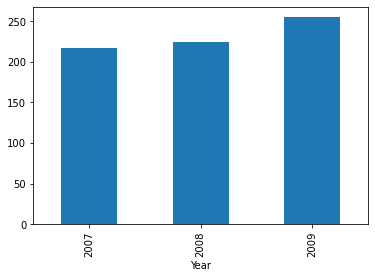

In [66]:
new_df.groupby('Year')['n_eggs'].sum().plot(kind='bar')

In [67]:
new_df.groupby('Year')['n_eggs'].sum().diff()

Year
2007     NaN
2008     8.0
2009    30.0
Name: n_eggs, dtype: float64

In [68]:
new_df.groupby('Year')['n_eggs'].sum().pct_change()

Year
2007         NaN
2008    0.036866
2009    0.133333
Name: n_eggs, dtype: float64

8. **Which is the change in Body Mass (g) for the penguins**

For each individual, in case there's more than one entry per penguin with the same `Individual ID`. You can use the helper function.

In [ ]:
def get_change(x):
    return x.max() - x.min()

In [ ]:
bodymasschange = df.groupby("___")["___"].transform(___)